In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [7]:
X , _ = make_blobs(n_samples=200, centers=1, cluster_std=2, random_state=42)

In [8]:
def divisive_clustering(data, max_clusters =4 ):
    clusters = [data]
    labels = np.zeros(len(data), dtype=int)
    while len(clusters) < max_clusters:
        idx_to_split= np.argmax([len(c) for c in clusters])## max value return karta hai index ki 
        cluster_to_split = clusters.pop(idx_to_split)
        #get a new level to assign to the newly formrds clusters
        current_label = np.max(labels) + 1
        #kmmeand to split the cluster
        kmeans = KMeans(n_clusters=2, random_state=42)
        split_labels = kmeans.fit_predict(cluster_to_split)
        #divides the cluster into two based on kmeansd data
        cluster1 = cluster_to_split[split_labels == 0]
        cluster2 = cluster_to_split[split_labels == 1]
        #add the new cluster back intp tthe list

        clusters.append(cluster1)
        clusters.append(cluster2)
        ## update  labels assignment
        label_indices = np.where([np.any(np.all(x == cluster_to_split,
                                         axis = 1)) for x in data])[0]
        label_subset = split_labels
        labels[label_indices] = current_label 
        labels[label_indices[split_labels == 0]] = current_label 
        labels[label_indices[split_labels == 1]] = current_label + 1
    return labels

In [9]:
cluster_labels = divisive_clustering(X, max_clusters=4)

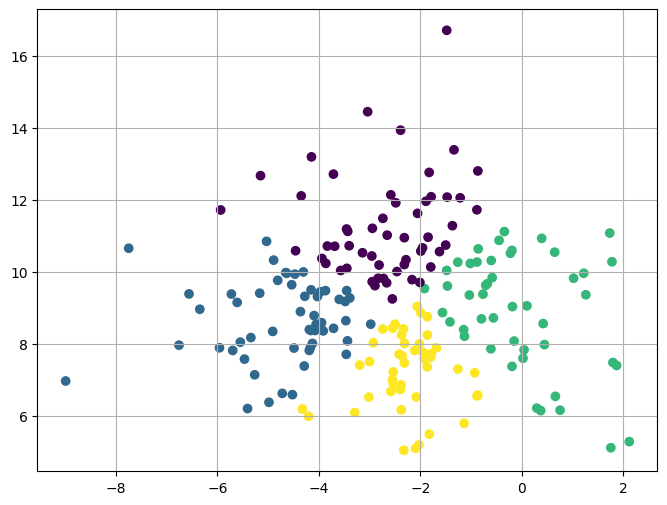

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels)
plt.grid(True)
plt.show()